EDA数据探索

In [32]:
from scipy.fft import fft
from scipy.io import wavfile
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle
from pprint import pprint

22050 (661794,)


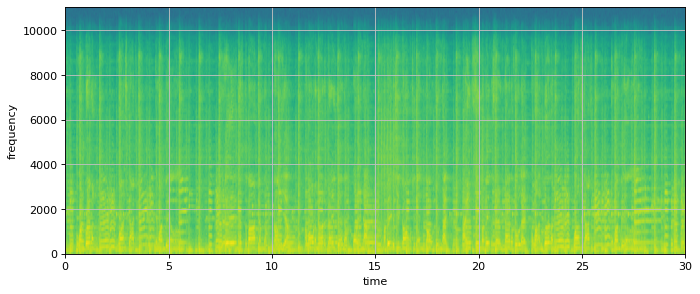

<module 'matplotlib.pyplot' from 'c:\\Users\\18873\\.conda\\envs\\d2l\\lib\\site-packages\\matplotlib\\pyplot.py'>

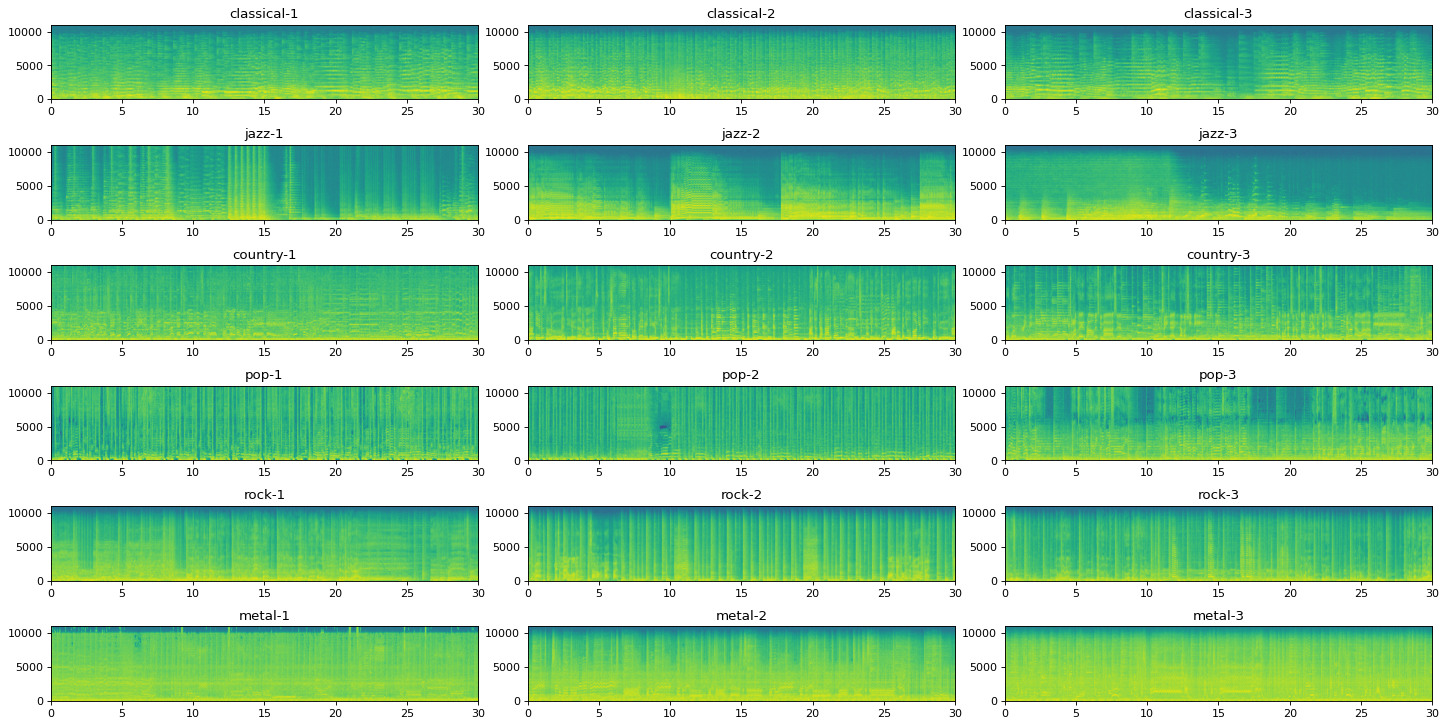

In [33]:
#数据读取
(sample_rate, X) = wavfile.read(r"C:\Users\18873\Desktop\python\ML\linear_classification\Softmax\genres\blues\converted\blues.00000.au.wav")
print(sample_rate, X.shape)

#频谱图
plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel('time')
plt.ylabel('frequency')
plt.grid(True, linestyle='-', color = '0.75')
specgram(X, Fs=sample_rate, xextent=(0, 30))
plt.show()

def plotSpec(g,n):
    sample_rate, X = wavfile.read(r"C:/Users/18873/Desktop/python/ML/linear_classification/Softmax/genres/" + g + "/converted/"+ g + '.' + n +'.au.wav')
    specgram(X, Fs=sample_rate, xextent=(0, 30))
    plt.title(g+'-'+n[-1])

plt.figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(6, 3, 1);plotSpec('classical', '00001')
plt.subplot(6, 3, 2);plotSpec('classical', '00002')
plt.subplot(6, 3, 3);plotSpec('classical', '00003')
plt.subplot(6, 3, 4);plotSpec('jazz', '00001')
plt.subplot(6, 3, 5);plotSpec('jazz', '00002')
plt.subplot(6, 3, 6);plotSpec('jazz', '00003')
plt.subplot(6, 3, 7);plotSpec('country', '00001')
plt.subplot(6, 3, 8);plotSpec('country', '00002')
plt.subplot(6, 3, 9);plotSpec('country', '00003')
plt.subplot(6, 3, 10);plotSpec('pop', '00001')
plt.subplot(6, 3, 11);plotSpec('pop', '00002')
plt.subplot(6, 3, 12);plotSpec('pop', '00003')
plt.subplot(6, 3, 13);plotSpec('rock', '00001')
plt.subplot(6, 3, 14);plotSpec('rock', '00002')
plt.subplot(6, 3, 15);plotSpec('rock', '00003')
plt.subplot(6, 3, 16);plotSpec('metal', '00001')
plt.subplot(6, 3, 17);plotSpec('metal', '00002')
plt.subplot(6, 3, 18);plotSpec('metal', '00003')

plt.tight_layout(pad=0.4, w_pad=0, h_pad=1.0)
plt


数据预处理

c:\Users\18873\.conda\envs\d2l\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


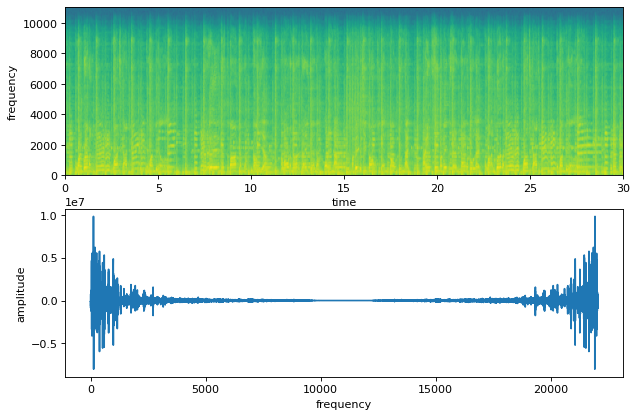

In [34]:
#傅里叶处理
sample_rate, X = wavfile.read(r"C:\Users\18873\Desktop\python\ML\linear_classification\Softmax\genres\blues\converted\blues.00000.au.wav")
plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
plt.xlabel('time')
plt.ylabel('frequency')
specgram(X, Fs=sample_rate, xextent=(0, 30))
plt.subplot(2, 1, 2)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.plot(fft(X, sample_rate))
plt.show()

In [35]:
#准备音乐数据，把音乐文件一个个的去使用傅里叶变换，并且把傅里叶变换之后的结果落地保存
def create_fft(g, n):
    rad = r"C:/Users/18873/Desktop/python/ML/linear_classification/Softmax/genres/" + g + "/converted/"+ g + '.' + str(n).zfill(5) +'.au.wav'
    sample_rate, X = wavfile.read(rad)
    fft_featrues = abs(fft(X)[:1000])
    sad = r"C:/Users/18873/Desktop/python/ML/linear_classification/Softmax/trainset/" + g +'.' + str(n).zfill(5) +'.fft'
    np.save(sad, fft_featrues)

genre_list = ['classical', 'jazz', 'country', 'pop', 'rock', 'metal']
for g in genre_list:
    for n in range(100):
        create_fft(g, n)

读取数据

In [36]:
genre_list = ['classical', 'jazz', 'country', 'pop', 'rock', 'metal']
X = []
y = []
for g in genre_list:
    for n in range(100):
        rad = r"C:/Users/18873/Desktop/python/ML/linear_classification/Softmax/trainset/"+g+'.'+str(n).zfill(5)+'.fft.npy'
        fft_features = np.load(rad)
        X.append(fft_features)
        y.append(genre_list.index(g))

X = np.array(X)
y = np.array(y)

模型训练

In [37]:
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=10000)
model.fit(X, y)

output = open('model.pkl', 'wb')
pickle.dump(model, output)
output.close()


读取模型（其实在这里 因为jupyter的原因 我们根本不需要有这一步）

In [38]:
pkl_file =  open('model.pkl','rb')
model_loaded = pickle.load(pkl_file)
pprint(model_loaded)
pkl_file.close()

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='sag')


我们暂时还没有音乐的wav文件 等待后续补充


www.xmwav.com(免费下载)

In [41]:
#已更新
music_name = '李荣浩-不将就.wav'
sample_rate, X = wavfile.read(r"C:/Users/18873/Desktop/python/ML/linear_classification/Softmax/"+music_name)

print(X.shape)
X = np.reshape(X, (1, -1))[0]

print(X.shape)
print(sample_rate, X)
test_fft_features = abs(fft(X)[:1000])
print(sample_rate, test_fft_features, len(test_fft_features))

result_index = model_loaded.predict([test_fft_features])[0]
print(genre_list[result_index])

C:\Users\18873\AppData\Local\Temp\ipykernel_25380\1792031527.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, X = wavfile.read(r"C:/Users/18873/Desktop/python/ML/linear_classification/Softmax/"+music_name)


(13803206, 2)
(27606412,)
44100 [0 0 0 ... 0 0 0]
44100 [4.30460763e+08 1.45938503e+08 8.69189443e+07 7.22175074e+07
 6.67876266e+07 1.85768030e+07 2.78381981e+07 5.99805294e+06
 6.53429514e+06 2.03306549e+07 1.50598736e+07 1.72934931e+07
 2.80679864e+07 2.22508276e+07 1.77681847e+07 2.50645430e+07
 2.44371162e+07 3.13569606e+07 4.12410824e+07 2.33576164e+07
 3.87496351e+07 1.99597955e+07 2.90446291e+07 5.21167710e+06
 1.59239116e+07 1.78320979e+07 1.92244931e+07 9.27635498e+06
 7.04296722e+06 1.33076464e+07 1.47048593e+07 1.91655181e+07
 1.19390947e+07 7.26712201e+06 3.69303030e+07 2.36818539e+07
 3.94320375e+06 2.93498688e+07 2.30670992e+07 2.11411163e+07
 2.35236504e+06 1.60211557e+07 7.79150256e+06 1.32999010e+07
 2.73735069e+07 3.36561176e+07 1.77962478e+07 2.52968732e+07
 7.05106764e+07 2.64160268e+07 1.78608192e+07 2.05795043e+07
 1.83135118e+07 1.31220067e+07 2.27677756e+07 2.26852504e+07
 1.28041249e+07 1.74594984e+07 9.58636821e+06 1.40750247e+07
 1.28376791e+07 1.01660662e+0